In [9]:
!pip install langchain langchain-community transformers torch


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.5 MB 3.4 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 4.8 MB/s eta 0:00:00


In [1]:
pip install langchain-openai


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
!pip install langchain transformers torch



Defaulting to user installation because normal site-packages is not writeable


In [20]:
#Dependencies
from langchain_openai import ChatOpenAI

In [21]:
# MODULES/DEPENDENCIES/LIBRARIES
import openai
from dotenv import load_dotenv
import os

In [22]:
# Creating a function to call the response from the prompt 
def get_response(prompt):
    #Load environment variable for env file
    load_dotenv()
    # define conversation messages 
    conversation_messages = [
        {"role": "user", "content": prompt}, 
        {"role": "system", "content": "What are some good conversation starters at networking events?"},
        {"role": "assistant", "content": ""}
       
    ]
     # Create an OpenAI client instance (new API structure)
    client = openai.OpenAI()
    #Create a request to the chat completion endpoint
   
    response = client.chat.completions.create( 
        model="gpt-4o-mini",
        messages = conversation_messages)
    return response.choices[0].message.content
        

In [23]:
#Test
request = get_response("Can you give me the first question to ask when meeting people")
print(request)

A great first question to ask when meeting people, especially at networking events, is: "What inspired you to come to this event?" This question opens up the conversation and allows the other person to share their interests and motivations, helping you find common ground.


In [25]:
# Creating a simple langchain_promot_function

def langchain_response(prompt):
    load_dotenv()
    llm = ChatOpenAI( model = "gpt-4o-mini")
    return llm.invoke(prompt)



In [26]:

# Test langchain function 
request_1 = langchain_response("What is the full meaning of LLM")
print(request_1)



content='LLM stands for "Large Language Model." It refers to a type of artificial intelligence model that is trained on vast amounts of text data to understand and generate human-like language. LLMs can perform a variety of tasks, including language translation, summarization, conversation, and more, depending on their training and architecture. If you have another context in mind for the acronym LLM, please let me know!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 15, 'total_tokens': 98, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'id': 'chatcmpl-BFtBEhqSRV5KTdOHKw0w6PfAFWpjY', 'finish_reason': 'stop', 'logprobs': None} id='run-1ae09d98-4093-4114-ad9c-386732755d1e-0' usage_metadat

In [11]:
  # Import the class for defining Hugging Face pipelines
#from langchain_huggingface import HuggingFacePipeline
from langchain.llms import HuggingFacePipeline
from transformers import pipeline


# Define the LLM from the Hugging Face model ID
llm = HuggingFacePipeline.from_model_id(
    model_id="crumb/nano-mistral",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 20}
)

prompt = "Hugging Face is"

# Invoke the model
response = llm.invoke(prompt)
print(response)

tokenizer_config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--crumb--nano-mistral. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/340M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Device set to use cpu


Hugging Face is a great way to get a little bit of a break from the stresses of life. It'


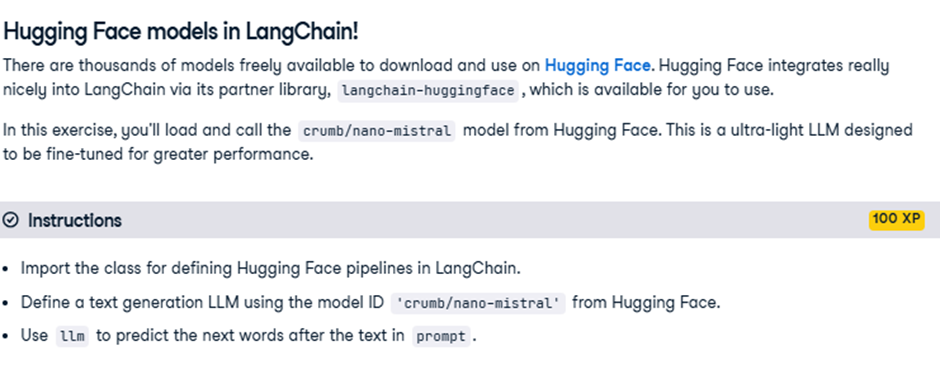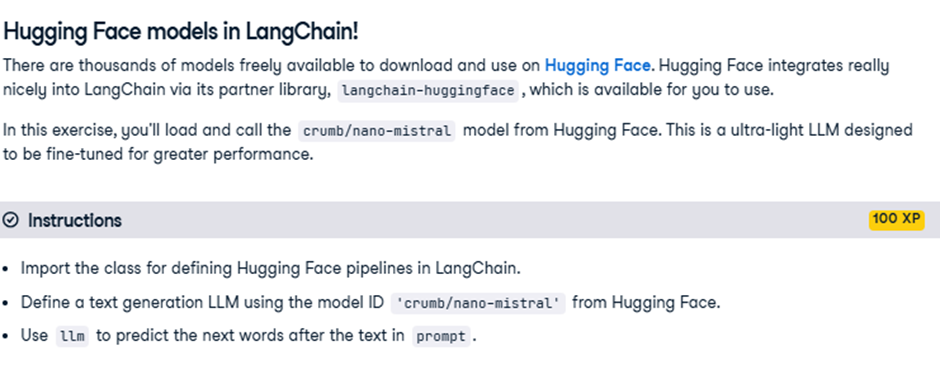


In [19]:
# Recall prompt template are recipes for defining prompts and can contain instructions , examples and additional context 
# Prompme Template 
from langchain_core.prompts import PromptTemplate

# template string with curly bracket giving room for dynamic insertion
template  = "Explain this concept in details : {concept}"
# convert the string into a prmpt template using the below
#prompt template class using the from_template method
prompt_template  = PromptTemplate.from_template(
    template = template )
#use the invoke method
prompt = prompt_template.invoke({"concept":"Prompting LLMs"})
print(prompt)

text='Explain this concept in details : Prompting LLMs'


In [21]:
# integrating the template with the an LLM
#model
llm = HuggingFacePipeline.from_model_id(
    model_id="crumb/nano-mistral",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 20}
)


#llm chain component used to integrate llm and prompt template using A PIPE OPERATOR
llm_chain = prompt_template | llm

value = "Prompting LLMs"

print(llm_chain.invoke({"concept":value}))

Device set to use cpu


Explain this concept in details : Prompting LLMs to be a tool for the development of a new language.

The first step in the development
